In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import quad

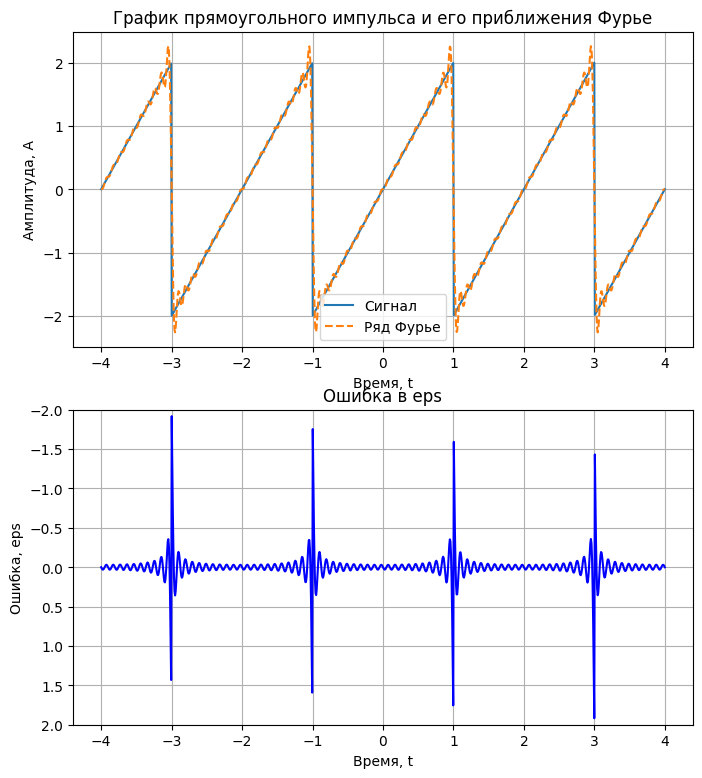

In [3]:
# Прямоугольный сигнал

an_s = []
bn_s = []

def fourier_series(t, f, period, A, n):
  global an_s
  global bn_s
  # Коэффициенты
  series = np.zeros_like(t)
  a0_result, _ = quad(lambda t: f(t, period, A), 0, period)
  a0 = a0_result / period
  an_s = []
  bn_s = []
  series += a0 / 2
  for x in range(1, n + 1):
    an_integrate = lambda t: f(t, period, A) * np.cos(2 * np.pi * x * t / period)
    an_res, _ = quad(an_integrate, 0, period)
    an = 2 * an_res / period
    an_s.append(an)

    bn_integrate = lambda t: f(t, period, A) * np.sin(2 * np.pi * x * t / period)
    bn_res, _ = quad(bn_integrate, 0, period)
    bn = 2 * bn_res / period
    bn_s.append(bn)

    series += an * np.cos(2 * np.pi * x * t / period) + bn * np.sin(2 * np.pi * x * t / period)

  return series

def saw_signal(t, period, A):
  return A * (2 * (t /period - np.floor(0.5+t/period)))

def rect_signal(t, period, A):
  return np.where((t % period) < (period / 2), A, -A)

def cosin_function(t, period, A):
  return A * np.cos(2 * np.pi / period * t)

def sin_function(t, period, A):
  return A * np.sin(2 * np.pi / period * t)

period = 2

A = 2.0

lenght = 4.0 # Длина расчёта функции

N = 1000 # Число точек для расчёта функции
n = 20 # Сумма для ряда Фурье

t = np.linspace(-lenght, lenght, N)

#pulse = rect_signal(t, period, A)
#fourier = fourier_series(t, rect_signal, period, A, n)

pulse = saw_signal(t, period, A)
fourier = fourier_series(t, saw_signal, period, A, n)

# Выводим

fig, axs = plt.subplots(2, 1, figsize=(8, 9))

axs[0].plot(t, pulse, label='Сигнал')
axs[0].plot(t, fourier, label='Ряд Фурье', linestyle='dashed')
axs[0].set_title('График прямоугольного импульса и его приближения Фурье')
axs[0].set_xlabel('Время, t')
axs[0].set_ylabel('Амплитуда, А')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, pulse - fourier, color='blue')
axs[1].set_ylim(A, -A)
axs[1].set_title('Ошибка в eps')
axs[1].set_xlabel('Время, t')
axs[1].set_ylabel('Ошибка, eps')
axs[1].grid(True)


[1.2732395447351625, -0.6366197723675815, 0.42441318157838764, -0.31830988618379086, 0.25464790894703254, -0.21220659078919382, 0.18189136353359514, -0.15915494309189554, 0.14147106052612934, -0.12732395447351658, 0.1157490495213789, -0.10610329539459701, 0.09794150344116635, -0.09094568176679792, 0.0848826363156779, -0.07957747154594749, 0.07489644380795005, -0.07073553026306492, 0.06701260761764047, -0.06366197723675843]


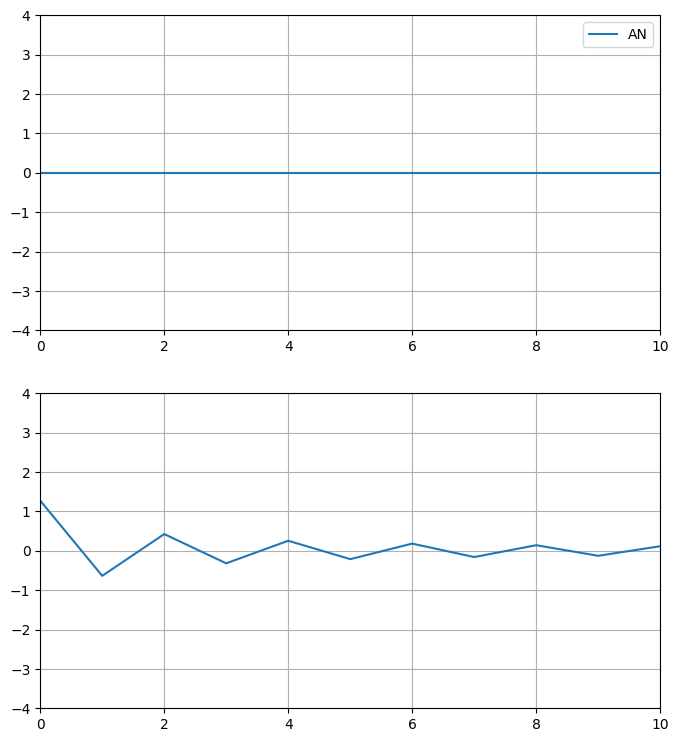

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(8, 9))


axs[0].plot(an_s, label='AN')
axs[0].set_xlim(0, 10)
axs[0].set_ylim(-4, 4)
#axs[0].plot(t, signal_series, label='Ряд Фурье', linestyle='dashed')
axs[0].grid(True)
axs[0].legend()

print(bn_s)
axs[1].plot(bn_s, label="BN")
axs[1].set_xlim(0, 10)
axs[1].set_ylim(-4, 4)
#axs[1].plot(frequencies_series[:N//2], np.abs(spectrum_series[:N//2] * 2 / N), label="Ряд Фурье", linestyle='dashed')
axs[1].grid(True)

In [5]:
def fourier_transform(signal, sample_rate):
    # Выполняем преобразование Фурье
    spectrum = np.fft.fft(signal)
    
    # Частоты для каждой компоненты спектра
    frequencies = np.fft.fftfreq(len(signal), d=1/sample_rate)
    
    return frequencies, spectrum


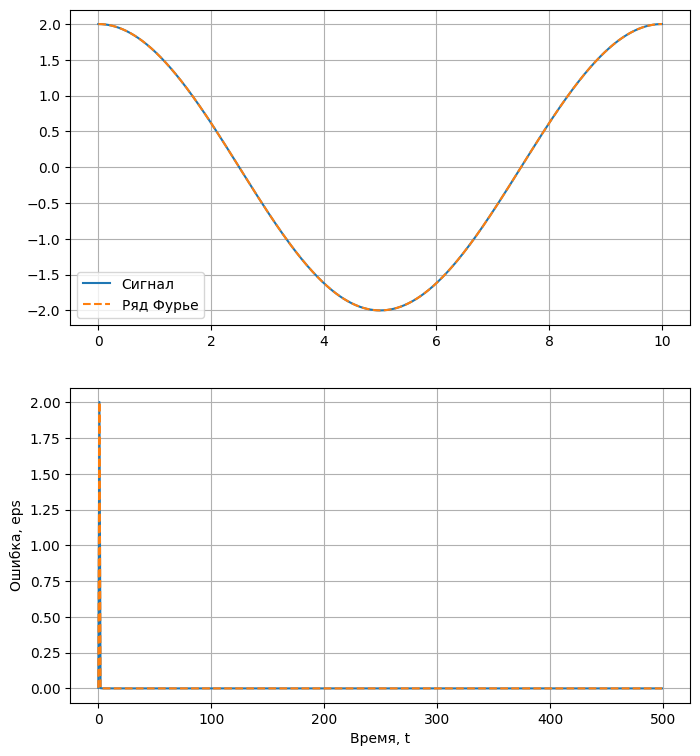

In [10]:
freq = 100.0 # Угловая частота

per = 1/freq

N = 1000
n = 10

t = np.linspace(0, N/freq, N)

#pulse = cosin_function(t, per, A)
#fourier = fouriers(t, cosin_function, per, A, n)

sample_rate = 1000  # Частота дискретизации в секунду

signal_true = cosin_function(t, per, A)
signal_series = fourier_series(t, cosin_function, per, A, n)

# Выполним преобразование Фурье

frequencies_series, spectrum_series = fourier_transform(signal_series, sample_rate)
frequencies_signal, spectrum_signal = fourier_transform(signal_true, sample_rate)

# Вывод

fig, axs = plt.subplots(2, 1, figsize=(8, 9))

#print(max(an_s))
#print(bn_s)

axs[0].plot(t, signal_true, label='Сигнал')
axs[0].plot(t, signal_series, label='Ряд Фурье', linestyle='dashed')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(frequencies_signal[:N//2], np.abs(spectrum_signal[:N//2] * 2 / N), label="Сигнал")
axs[1].plot(frequencies_series[:N//2], np.abs(spectrum_series[:N//2] * 2 / N), label="Ряд Фурье", linestyle='dashed')
axs[1].set_xlabel('Время, t')
axs[1].set_ylabel('Ошибка, eps')
axs[1].grid(True)


[2.5464790894703255, 1.838168589960133e-17, 0.8488263631567756, -1.6548576749155088e-16, 0.5092958178940649, 1.542288069499316e-16, 0.36378272706719034, -8.15763120311436e-16, 0.28294212105225836, -4.57968137788629e-16, 0.23149809904275767, 1.8347585292132707e-16, 0.19588300688233362, 1.415330699637975e-15, 0.16976527263135574, 6.763570433847366e-16, 0.14979288761590057, 1.9517628919012493e-15, 0.13402521523528096, 5.268433625170288e-16]


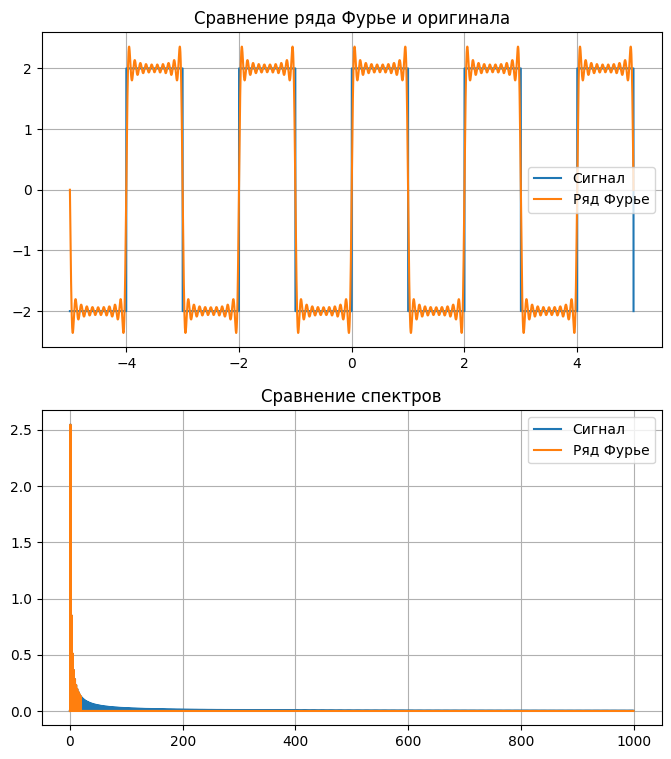

In [13]:
freq = 100.0

per = 2.0
A = 2.0

N = 1000
n = 20
sample_rate = 2000
lenght = 2

t = np.linspace(-lenght, lenght, N)
pulse = rect_signal(t, per, A)
fourier = fourier_series(t, rect_signal, per, A, n)


signal_true = rect_signal(t, per, A)
signal_series = fourier_series(t, rect_signal, per, A, n)

# Выполним преобразование Фурье

frequencies_series, spectrum_series = fourier_transform(signal_series, sample_rate)
frequencies_signal, spectrum_signal = fourier_transform(signal_true, sample_rate)


fig, axs = plt.subplots(2, 1, figsize=(8, 9))

print(bn_s)

axs[0].plot(t, pulse, label='Сигнал')
axs[0].plot(t, fourier, label='Ряд Фурье')
axs[0].set_title("Сравнение ряда Фурье и оригинала")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(frequencies_signal[:N//2], np.abs(spectrum_signal[:N//2] * 2 / N), label="Сигнал")
axs[1].plot(frequencies_series[:N//2], np.abs(spectrum_series[:N//2] * 2 / N), label="Ряд Фурье")
axs[1].set_title("Сравнение спектров")
axs[1].legend()
axs[1].grid(True)

In [8]:
# fig, axs = plt.subplots(2, 1, figsize=(8, 9))


# axs[0].bar(len(an_s), an_s, width=2, label='AN')
# axs[0].set_xlim(0, 10)
# axs[0].set_ylim(-4, 4)
# #axs[0].plot(t, signal_series, label='Ряд Фурье', linestyle='dashed')
# axs[0].grid(True)
# axs[0].legend()

# print(bn_s)
# axs[1].bar(len(bn_s), bn_s, width=2, label="BN")
# axs[1].set_xlim(0, 10)
# axs[1].set_ylim(-4, 4)
# #axs[1].plot(frequencies_series[:N//2], np.abs(spectrum_series[:N//2] * 2 / N), label="Ряд Фурье", linestyle='dashed')
# axs[1].grid(True)

Добавим шумы

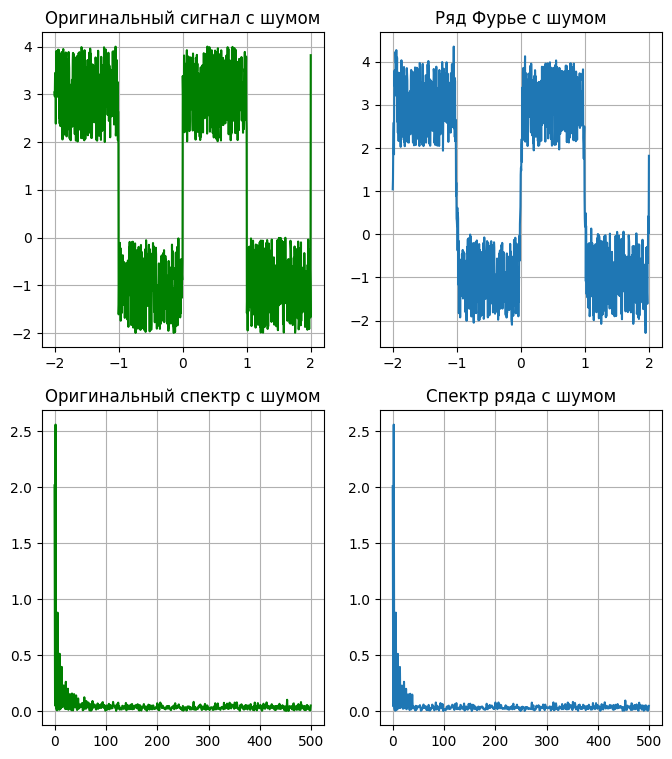

In [9]:
# Добавим шумы
import random as rn

noise_amp = 2
noises = np.random.random(N) * noise_amp

frequencies_series, spectrum_series = fourier_transform(signal_series + noises, sample_rate)
frequencies_signal, spectrum_signal = fourier_transform(signal_true + noises, sample_rate)


fig, axs = plt.subplots(2, 2, figsize=(8, 9))

axs[0][0].plot(t, pulse + noises, label='Сигнал', color='green')
axs[0][0].set_title("Оригинальный сигнал с шумом")
axs[0][1].plot(t, fourier + noises)
axs[0][1].set_title("Ряд Фурье с шумом")
axs[0][0].grid(True)
axs[0][1].grid(True)

axs[1][0].plot(frequencies_signal[:N//2], np.abs(spectrum_signal[:N//2] * 2 / N), color="green")
axs[1][1].plot(frequencies_series[:N//2], np.abs(spectrum_series[:N//2] * 2 / N))
axs[1][0].set_title("Оригинальный спектр с шумом")
axs[1][1].set_title("Спектр ряда с шумом")
axs[1][0].grid(True)
axs[1][1].grid(True)